# Results from the web app in simulated data
In this notebook, we create the input CSV files we use in the web app from simulation data. Then, we analyse the results with simple metrics. First, we import the Python packages.

In [1]:
import glob
import csv
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from astropy.table import Table

from sklearn.dummy import DummyRegressor
from sklearn.metrics import median_absolute_error, r2_score
from scipy.stats import binned_statistic

In [2]:
# Functions
def perc75(aray):
    "Short cut to calculate the 75th percentile in an array"
    return np.nanpercentile(aray, 75)


def perc25(aray):
    "Short cut to calculate the 25th percentile in an array"
    return np.nanpercentile(aray, 25)

## Read simulation file
Here, we read the simulation file containing the FIR luminosities we created for the Paper II in our series of "Diagnosing the interstellar medium of galaxies with far-infrared emission lines".

In [3]:
dataset = Table.read('../data/raw/complete_dataset.fits',
                     format='fits')
dataset['log(1+z)'] = np.log10(dataset['z']+1)
del dataset['z']

We send the astropy table to a pandas dataframe to manage and order the data

In [4]:
dat_pd = dataset.to_pandas()

dat_pd.rename(columns={'L$_{\\mathrm{OIII_{52}}}$': 'Lum_OIII_52',
                       'L$_{\\mathrm{NIII_{57}}}$': 'Lum_NIII_57',
                       'L$_{\\mathrm{OI_{63}}}$': 'Lum_OI_63',
                       'L$_{\\mathrm{OIII_{88}}}$': 'Lum_OIII_88',
                       'L$_{\\mathrm{NII_{122}}}$': 'Lum_NII_122',
                       'L$_{\\mathrm{OI_{145}}}$': 'Lum_OI_145',
                       'L$_{\\mathrm{CII}}$': 'Lum_CII_158',
                       'L$_{\\mathrm{NII_{205}}}$': 'Lum_NII_205',
                       'log(1+z)': 'z'
                       },
              inplace=True)

We describe the data to see how many rows are empty

In [5]:
df1 = dat_pd.describe(include='all')
df1.loc['dtype'] = dat_pd.dtypes
df1.loc['size'] = len(dat_pd)
df1.loc['% count'] = dat_pd.isnull().mean()

df1[['Lum_OIII_52', 'Lum_NIII_57', 'Lum_OI_63', 'Lum_OIII_88',
    'Lum_NII_122', 'Lum_OI_145', 'Lum_CII_158', 'Lum_NII_205']]

,Lum_OIII_52,Lum_NIII_57,Lum_OI_63,Lum_OIII_88,Lum_NII_122,Lum_OI_145,Lum_CII_158,Lum_NII_205
count,8274.0,8274.0,8274.0,8274.0,8274.0,8274.0,8274.0,8274.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.574862,6.129866,6.473308,6.736991,5.253933,5.254578,6.644437,5.112692
std,1.254975,1.222734,1.050283,1.21463,0.921636,1.052292,0.709981,0.801247
min,2.309584,2.020303,0.8747,2.62473,0.727134,-0.255292,3.785174,1.382968
25%,5.888422,5.449244,5.778986,6.051737,4.803064,4.603315,6.167182,4.678533
50%,6.87172,6.391744,6.645607,7.022389,5.320186,5.462896,6.718172,5.11613
75%,7.39249,6.917332,7.264141,7.53689,5.784042,6.042642,7.153725,5.575004


We select the four different sets we are going to test in the web app.

In [6]:
dat_pd_A = dat_pd.dropna(subset=['z', 'SFR', 'Lum_CII_158', 'Lum_OI_63'])
dat_pd_B = dat_pd.dropna(subset=['z', 'SFR', 'Lum_CII_158', 'Lum_OIII_88'])
dat_pd_C = dat_pd.dropna(subset=['z', 'SFR', 'Lum_OI_63',
                                 'Lum_CII_158', 'Lum_NII_205'])
dat_pd_D = dat_pd.dropna(subset=['z', 'SFR', 'Lum_NIII_57', 'Lum_OIII_52'])

We print the maximum redshifts for each dataset

In [7]:
list_sets = [dat_pd_A, dat_pd_B, dat_pd_C, dat_pd_D]
for stp in list_sets:
    print(np.round((10**stp['z'] - 1).max(), 3))

6.0
6.0
6.0
6.0


Finally we save these data frames in CSV files

In [68]:
dat_pd_A.to_csv('../data/interim/inputs_DiagISM/Simdata_set_A.csv', mode='w',
                columns=['z', 'Lum_CII_158', 'Lum_OI_63'], index=False)
dat_pd_B.to_csv('../data/interim/inputs_DiagISM/Simdata_set_B.csv', mode='w',
                columns=['z', 'Lum_CII_158', 'Lum_OIII_88'], index=False)
dat_pd_C.to_csv('../data/interim/inputs_DiagISM/Simdata_set_C.csv', mode='w',
                columns=['z', 'Lum_OI_63', 'Lum_CII_158', 'Lum_NII_205'], index=False)
dat_pd_D.to_csv('../data/interim/inputs_DiagISM/Simdata_set_D.csv', mode='w',
                columns=['z', 'Lum_NIII_57', 'Lum_OIII_52'], index=False)

## Results assumed error
We plot the changes on the R$^2$ and MAE with sigma for the different simulation sets

In [8]:
files_sigma = ['%03d' % val for val in range(5, 61, 5)]

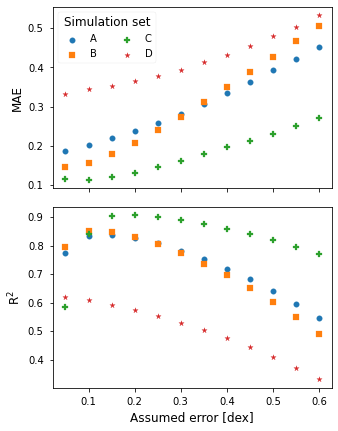

In [11]:
markers = ['o', 's', 'P', '*']
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)
    for istp, sample in enumerate(['A', 'B', 'C', 'D']):
        for sigma in files_sigma:
            file = '../data/processed/outputs_DiagISM/sim_all_sigma/DiagISM_result_sim_s' + \
                sample+sigma+'.csv'
            results = Table.read(file,
                                 format='ascii.csv', header_start=5)
            mae = median_absolute_error(dat_pd['SFR'], results['mean'])
            r2_val = r2_score(dat_pd['SFR'], results['mean'])
    #         print(sample, mae, r2_val)
            axs[1].scatter(int(sigma)/100, r2_val, c='C'+str(istp),
                           marker=markers[istp])
            axs[1].set_ylabel(r'R$^{2}$')
            axs[0].scatter(int(sigma)/100, mae, c='C'+str(istp), marker=markers[istp],
                           label='%s' % sample if sigma == '005' else None)
            axs[0].set_ylabel(r'MAE')
            axs[1].set_xlabel('Assumed error [dex]')
        axs[0].legend(ncol=2, title='Simulation set')
    plt.subplots_adjust(hspace=0.1)
    plt.savefig('../figures/Sigma.pdf',
                dpi=300, bbox_inches='tight')  # For Paper

## Results metrics
We estimate the median absolute error and R$^2$ metrics to compare the two models in a table for the SFR.

In [12]:
for model in ['M8all', 'M2plus']:
    for istp, sample in enumerate(['A', 'B', 'C', 'D', ]):
        file = '../data/processed/outputs_DiagISM/DiagISM_result_'+model+'_s'+sample+'.csv'
        results = Table.read(file,
                             format='ascii.csv', header_start=5)
        with open(file, "r") as metric:
            score_train = (float(metric.readlines()[3].split(':')[-1]))
        mae = median_absolute_error(list_sets[istp]['SFR'], results['mean'])
        r2_val = r2_score(list_sets[istp]['SFR'], results['mean'])
        print(model, sample, score_train, np.round(r2_val, 3), np.round(mae, 2))

M8all A 0.969 0.828 0.24
M8all B 0.969 0.829 0.21
M8all C 0.969 0.908 0.13
M8all D 0.969 0.574 0.36
M2plus A 0.929 0.925 0.13
M2plus B 0.934 0.933 0.1
M2plus C 0.952 0.943 0.09
M2plus D 0.857 0.855 0.16


We compare these metrics with a `DummyRegressor` to set the baseline

In [13]:
Dreg = DummyRegressor()
Dreg.fit(dat_pd_A[['z', 'Lum_CII_158', 'Lum_OIII_88']], dat_pd_A['SFR'])
DumPred = Dreg.predict(dat_pd_A[['z', 'Lum_CII_158', 'Lum_OIII_88']])

In [14]:
print('MAE: ', np.round(median_absolute_error(dat_pd_A['SFR'], DumPred), 3))
print('R2: ', r2_score(dat_pd_A['SFR'], DumPred))

MAE:  0.502
R2:  0.0


## Difference between the estimates
We plot how are the difference with respect to the mean predicted value for the two models and four sets. First, for the SFR and then for the other parameters.

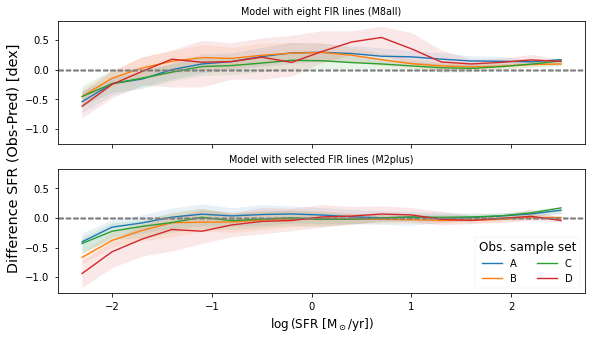

In [15]:
lab_models = ['Model with eight FIR lines (M8all)',
              'Model with selected FIR lines (M2plus)']
bins_sfr = np.linspace(-3.2, 2.5, 20)
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, axs = plt.subplots(2, 1, figsize=(9.44, 5), sharex=True, sharey=True)
    color_stp = ['C'+str(i) for i in range(4)]
    for imodel, model in enumerate(['M8all', 'M2plus']):
        axs[imodel].set_title(lab_models[imodel])
        for istp, sample in enumerate(['A', 'B', 'C', 'D']):
            file = '../data/processed/outputs_DiagISM/DiagISM_result_'+model+'_s'+sample+'.csv'
            results = Table.read(file,
                                 format='ascii.csv', header_start=5)
            diff = dat_pd['SFR'] - results['mean']
            limdata = 10  # len(dat_pd)*0.00
            bin_med, _, bnum = binned_statistic(dat_pd['SFR'],
                                                diff,
                                                statistic='median',
                                                bins=bins_sfr)
            bin_per75, _, _ = binned_statistic(dat_pd['SFR'],
                                               diff,
                                               statistic=perc75,
                                               bins=bins_sfr)
            bin_per25, _, _ = binned_statistic(dat_pd['SFR'],
                                               diff,
                                               statistic=perc25,
                                               bins=bins_sfr)
            binss, n_binss = np.unique(bnum, return_counts=True)
            axs[imodel].plot(bins_sfr[1:][binss[n_binss > limdata]],
                             bin_med[binss[n_binss > limdata]],
                             c=color_stp[istp],
                             label=sample)
            axs[imodel].fill_between(x=bins_sfr[1:][binss[n_binss > limdata]],
                                     y1=bin_per75[binss[n_binss > limdata]],
                                     y2=bin_per25[binss[n_binss > limdata]],
                                     color=color_stp[istp], alpha=0.1)
#             axs[imodel].set_ylabel('Difference [dex]')
            axs[imodel].axhline(y=0.0, ls="--", c='gray')
    fig.supylabel('Difference SFR (Obs-Pred) [dex]', x=0.05)
    plt.legend(ncol=2, title='Obs. sample set')
    plt.xlabel(r'$\log$(SFR [M$_\odot$/yr])')
#     plt.savefig('../figures/Errors_SFR.pdf',
#                 dpi=300, bbox_inches='tight')  # For Paper

We check the files we are using are the correct ones.

In [16]:
def check_files(folder):
    """Check if files in the folder are for the same model"""
    directory = '../data/processed/outputs_DiagISM/sim_parameters_'+folder+'/*.csv'
    files = glob.glob(directory)
    for file in files:
        with open(file, "r") as f:
            reader = csv.reader(f, delimiter="\t")
            for irow, row in enumerate(reader):
                if irow == 4:
                    print(row, file)

In [17]:
check_files('M2plus')

["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_stellarMass_sD.csv
["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_pressure_sD.csv
["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_ISRF_sD.csv
["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_gasMass_sD.csv
["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_metallicity_sD.csv
["# Model: Selected FIR lines. Features: ['Lum_NIII_57', 'Lum_OIII_52', 'log(1+z)'] "] ../data/processed/outputs_DiagISM/sim_para

In [18]:
check_files('M8all')

['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_pressure_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_metallicity_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_ISRF_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_density_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_gasMass_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_cloudSize_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_stellarMass_sC.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_stellarMass_sA.csv
['# Model: Eight FIR lines '] ../data/processed/outputs_DiagISM/sim_

Then, we plot the difference for all the parameters retrieved by DiagISM. In addition, we print the mean dispersion for the density, pressure, ISRF and metallicity.

ISRF A 0.5916257288769724
metallicity A 0.42925466312659943
pressure A 0.7737600429494741
density A 0.5014673487687159
stellarMass A 0.19594671550219658
ISRF B 0.5138616583097424
metallicity B 0.3229197690170187
pressure B 0.6026293769958895
density B 0.37446971568648024
stellarMass B 0.2410092195103234
ISRF C 0.5393376633533324
metallicity C 0.3179512934624268
pressure C 0.6181580715655606
density C 0.44890300839481945
stellarMass C 0.29911259683473046
ISRF D 0.5468434208166454
metallicity D 0.23632499764147835
pressure D 0.6257430124480517
density D 0.3776471654222198
stellarMass D 0.28753366627590443


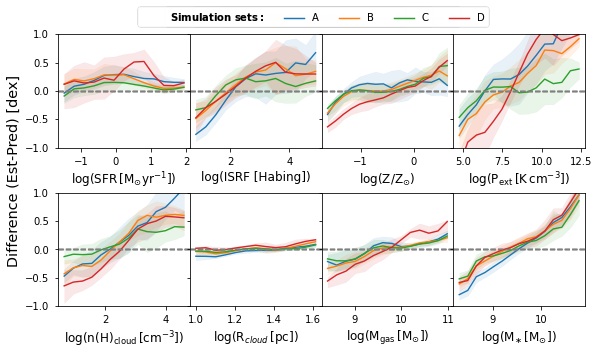

In [27]:
stps = ['B', 'ISRF', 'metallicity', 'pressure',
        'density', 'cloudSize',  'gasMass',  'stellarMass']
lab_pars = [r'$\rm{SFR}\, [\rm{M}_{\odot} \rm{yr}^{-1}]$', r'ISRF [Habing]', r'$\rm{Z/Z}_{\odot}$',
            r'P$_{\rm{ext}}\, [\rm{K\, cm}^{-3}]$', r'n(H)$_{\rm{cloud}}\, [\rm{cm}^{-3}]$',
            r'R$_{cloud}\, [\rm{pc}]$', r'$\rm{M}_{\rm{gas}}\, [\rm{M}_{\odot}]$',
            r'$\rm{M}_{\ast}\, [\rm{M}_{\odot}]$']
sim_par = ['SFR', 'ISRF', 'ZGal', 'Pressure',
           'n$(\mathrm{H})_{\mathrm{cloud}}$', 'R$_{\mathrm{cloud}}$',
           'M$_{\mathrm{gas}}$', r'M$_{\mathrm{\ast}}$']
tit_leg = mlines.Line2D([], [], marker="", ls="", label="Simulation set")
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, axes = plt.subplots(2, 4, figsize=(9.44, 5), sharey=True)
    axs = axes.ravel()
    axs[0].plot([], [], marker="", ls="",
                label=r"$\rm{\bf{Simulation\,\,sets:}}$")
    for istp, sample in enumerate(['A', 'B', 'C', 'D']):
        for ipar, param in enumerate(stps):
            if ipar == 0:
                file = '../data/processed/outputs_DiagISM/DiagISM_result_M8all_s'+sample+'.csv'
            else:
                file = '../data/processed/outputs_DiagISM/sim_parameters_M8all/DiagISM_result_' + \
                    param+'_s'+sample+'.csv'
            results = Table.read(file,
                                 format='ascii.csv', header_start=5)
            diff = dat_pd[sim_par[ipar]] - results['mean']
            limdata = len(dat_pd)*0.01
            bins_par = np.linspace(dat_pd[sim_par[ipar]].min(),
                                   dat_pd[sim_par[ipar]].max(),
                                   21)
            bin_med, _, bnum = binned_statistic(dat_pd[sim_par[ipar]],
                                                diff,
                                                statistic='median',
                                                bins=bins_par)
            bin_per75, _, _ = binned_statistic(dat_pd[sim_par[ipar]],
                                               diff,
                                               statistic=perc75,
                                               bins=bins_par)
            bin_per25, _, _ = binned_statistic(dat_pd[sim_par[ipar]],
                                               diff,
                                               statistic=perc25,
                                               bins=bins_par)
            binss, n_binss = np.unique(bnum, return_counts=True)
            axs[ipar].plot(bins_par[1:][binss[n_binss > limdata]],
                           bin_med[binss[n_binss > limdata]],
                           c=color_stp[istp],
                           label=sample if ipar == 0 else None)
            axs[ipar].fill_between(x=bins_par[1:][binss[n_binss > limdata]],
                                   y1=bin_per75[binss[n_binss > limdata]],
                                   y2=bin_per25[binss[n_binss > limdata]],
                                   color=color_stp[istp], alpha=0.1)
            if param in ['density', 'pressure', 'metallicity', 'ISRF', 'stellarMass']:
                print(param, sample, 
                      np.mean(bin_per75[binss[n_binss > limdata]] -
                              bin_per25[binss[n_binss > limdata]]))
            axs[ipar].axhline(y=0.0, ls="--", c='gray')
            axs[ipar].set_xlabel('log('+lab_pars[ipar]+')')
            axs[ipar].set_ylim(-1, 1)
            f = plt.gcf()
            f.legend(bbox_to_anchor=(0.0, 0.9, 1.0, 0.1),
                     loc=8, fontsize=10, ncol=5,
                     borderaxespad=0.)
        fig.supylabel('Difference (Est-Pred) [dex]', x=0.05)
        plt.subplots_adjust(wspace=0, hspace=0.4)
        plt.savefig('../figures/Difference_parameters_M8all.pdf',
                    dpi=300, bbox_inches='tight')  # For Paper

ISRF A 0.5158180357537284
metallicity A 0.27217213170562204
pressure A 0.7360016425409268
density A 0.6153410642419829
stellarMass A 0.2922398079785939
ISRF B 0.48836616921481035
metallicity B 0.2591257206931762
pressure B 0.6487537833909188
density B 0.46380641379249093
stellarMass B 0.2742199885421362
ISRF C 0.48751079555508664
metallicity C 0.2714615509137306
pressure C 0.5867593277710854
density C 0.4297854159567849
stellarMass C 0.2850857210656084
ISRF D 0.4691640343690714
metallicity D 0.19515716311339143
pressure D 0.6736675118709393
density D 0.4329138538460615
stellarMass D 0.3281040386962497


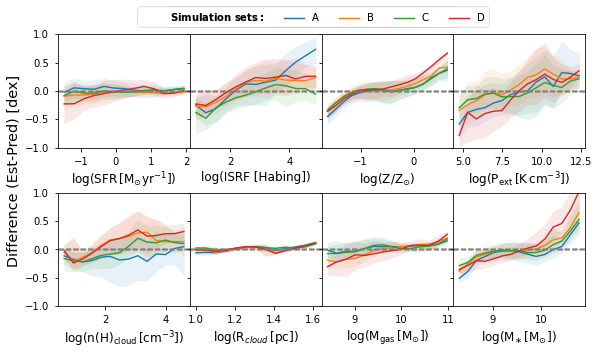

In [28]:
stps = ['B', 'ISRF', 'metallicity', 'pressure',
        'density', 'cloudSize',  'gasMass',  'stellarMass']
lab_pars = [r'$\rm{SFR}\, [\rm{M}_{\odot} \rm{yr}^{-1}]$', r'ISRF [Habing]', r'$\rm{Z/Z}_{\odot}$',
            r'P$_{\rm{ext}}\, [\rm{K\, cm}^{-3}]$', r'n(H)$_{\rm{cloud}}\, [\rm{cm}^{-3}]$',
            r'R$_{cloud}\, [\rm{pc}]$', r'$\rm{M}_{\rm{gas}}\, [\rm{M}_{\odot}]$',
            r'$\rm{M}_{\ast}\, [\rm{M}_{\odot}]$']
sim_par = ['SFR', 'ISRF', 'ZGal', 'Pressure',
           'n$(\mathrm{H})_{\mathrm{cloud}}$', 'R$_{\mathrm{cloud}}$',
           'M$_{\mathrm{gas}}$', r'M$_{\mathrm{\ast}}$']
tit_leg = mlines.Line2D([], [], marker="", ls="", label="Simulation set")
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, axes = plt.subplots(2, 4, figsize=(9.44, 5), sharey=True)
    axs = axes.ravel()
    axs[0].plot([], [], marker="", ls="",
                label=r"$\rm{\bf{Simulation\,\,sets:}}$")
    for istp, sample in enumerate(['A', 'B', 'C', 'D']):
        for ipar, param in enumerate(stps):
            if ipar == 0:
                file = '../data/processed/outputs_DiagISM/DiagISM_result_M2plus_s'+sample+'.csv'
            else:
                file = '../data/processed/outputs_DiagISM/sim_parameters_M2plus/DiagISM_result_' + \
                    param+'_s'+sample+'.csv'
            results = Table.read(file,
                                 format='ascii.csv', header_start=5)
            diff = dat_pd[sim_par[ipar]] - results['mean']
            limdata = len(dat_pd)*0.01
            bins_par = np.linspace(dat_pd[sim_par[ipar]].min(),
                                   dat_pd[sim_par[ipar]].max(),
                                   21)
            bin_med, _, bnum = binned_statistic(dat_pd[sim_par[ipar]],
                                                diff,
                                                statistic='median',
                                                bins=bins_par)
            bin_per75, _, _ = binned_statistic(dat_pd[sim_par[ipar]],
                                               diff,
                                               statistic=perc75,
                                               bins=bins_par)
            bin_per25, _, _ = binned_statistic(dat_pd[sim_par[ipar]],
                                               diff,
                                               statistic=perc25,
                                               bins=bins_par)
            binss, n_binss = np.unique(bnum, return_counts=True)
            axs[ipar].plot(bins_par[1:][binss[n_binss > limdata]],
                           bin_med[binss[n_binss > limdata]],
                           c=color_stp[istp],
                           label=sample if ipar == 0 else None)
            axs[ipar].fill_between(x=bins_par[1:][binss[n_binss > limdata]],
                                   y1=bin_per75[binss[n_binss > limdata]],
                                   y2=bin_per25[binss[n_binss > limdata]],
                                   color=color_stp[istp], alpha=0.1)
            if param in ['density', 'pressure', 'metallicity', 'ISRF','stellarMass']:
                print(param, sample, 
                      np.mean(bin_per75[binss[n_binss > limdata]] -
                              bin_per25[binss[n_binss > limdata]]))
            axs[ipar].axhline(y=0.0, ls="--", c='gray')
            axs[ipar].set_xlabel('log('+lab_pars[ipar]+')')
            axs[ipar].set_ylim(-1, 1)
            f = plt.gcf()
            f.legend(bbox_to_anchor=(0.0, 0.9, 1.0, 0.1),
                     loc=8, fontsize=10, ncol=5,
                     borderaxespad=0.)
        fig.supylabel('Difference (Est-Pred) [dex]', x=0.05)
        plt.subplots_adjust(wspace=0, hspace=0.4)
        plt.savefig('../figures/Difference_parameters_M2plus.pdf',
                    dpi=300, bbox_inches='tight')  # For Paper

##### Notebook info

In [5]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w -p scipy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.59.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
scipy: 1.7.1

autopep8  : 1.5.7
csv       : 1.0
numpy     : 1.22.1
json      : 2.0.9
matplotlib: 3.4.3

Watermark: 2.2.0

